In [455]:
import gensim
from gensim.models import Word2Vec
from gensim.test.utils import common_texts, get_tmpfile
import nltk
from nltk.data import find
from nltk.corpus import brown, movie_reviews, treebank, wordnet
from nltk.corpus import wordnet as wn

In [456]:
nltk.download('word2vec_sample')
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     /home/davidfan/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


In [457]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
model.most_similar(positive=['university'], topn = 3)
print(model.similarity('under','below'))
print(model.similarity('under','above'))

0.31183848
0.33855814


In [458]:
position_list = [
      'left',
      'right',
      'above',
      'below',
      'inside',
      'surrounding']


In [459]:
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [484]:
wn.synsets('surrounding')[0].lemma_names()
x = []
y = []
posi_lists = []
for i in range(len(position_list)):
  tmp_lists = []
  numberofsyn = len(wn.synsets(position_list[i]))
  for j in range(numberofsyn):
    for w in wn.synsets(position_list[i])[j].lemma_names():
      if '_' not in w and w in model:
        tmp_lists.append(w)
        x.append(model[w])
        y.append(i)
  posi_lists.append(list(set(tmp_lists)))
print((posi_lists))

[['allow', 'lead', 'depart', 'provide', 'impart', 'remaining', 'entrust', 'exit', 'give', 'unexpended', 'leftfield', 'left', 'odd', 'result', 'will', 'leave', 'forget'], ['rightfield', 'correctly', 'ripe', 'properly', 'redress', 'mighty', 'flop', 'mightily', 'veracious', 'justly', 'correct', 'compensate', 'proper', 'right', 'decent', 'good', 'decently', 'powerful'], ['above', 'supra'], ['downstairs', 'below', 'beneath', 'infra', 'under'], ['inwardly', 'within', 'inside', 'interior', 'indoors', 'inner', 'privileged'], ['besiege', 'wall', 'surround', 'skirt', 'fence', 'surrounding', 'ring', 'border']]


(139, 50)
(139, 2)


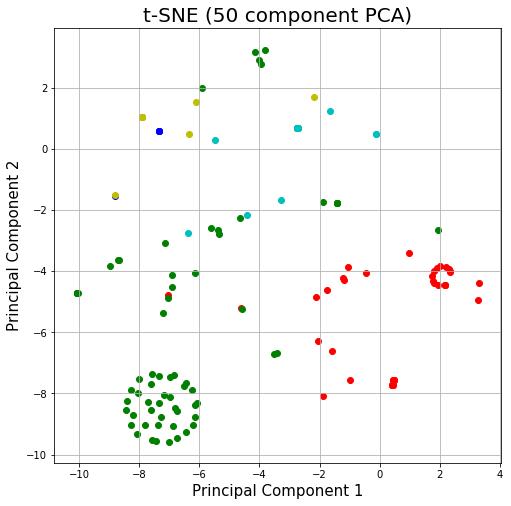

In [485]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=50)
pca.fit(x)

x = pca.transform(x)
x = np.array(x)
y = np.array(y)
print(x.shape)
x = TSNE(n_components=2).fit_transform(x)
print(x.shape)
fig = plt.figure(figsize = (8,8))
colors = ['r', 'g', 'b', 'y', 'c', 'g']
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('t-SNE (50 component PCA)', fontsize = 20)
for loc, color_id in zip(x,y):
  ax.scatter(loc[0], loc[1], c = colors[color_id])
ax.grid()
plt.savefig('./t-50.png')

In [448]:
clf = svm.SVC()
clf.fit(x, y)

/home/davidfan/VLL/T2I_general/env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [453]:
test = ['left']
for i in range(len(test)):
  if i == 0:
    tmp = np.array(model[test[i]])
  else:
    tmp = tmp + np.array(model[test[i]])
# tmp = np.array([tmp,tmp])


In [454]:
# print(tmp)
tmp = pca.transform(tmp.reshape(1,-1))
print(clf.predict(tmp))
# print(clf.support_vectors_)

[0]
